# 五、单目视觉里程记的实现

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 引用之前的工作完成的代码
from gray_video import gray_video
from core import resolve_T


%matplotlib widget
"""
设置中文
"""
plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


In [2]:
# 相机内参
K = np.array([[1.20981082e+03, -6.38606499e-01,  6.27897309e+02],
              [0.00000000e+00,  1.18458039e+03,  3.30943028e+02],
              [0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

In [3]:
samples = gray_video

In [4]:
# 相机位姿转移矩阵
Ts = []
# 让相机初始位姿为世界坐标原点位姿
Ts.append(np.eye(4))
# 环境特征点
env_points = []

step = 1
for i in range(len(samples) // step):
    # cv2.imshow('T', gray_video2[i*step])
    # cv2.waitKey(10)
    try:
        gray1 = samples[i*step]
        gray2 = samples[i*step+step]
        T, ps = resolve_T(gray1, gray2, K)
        Ts.append(T)
        env_points.append(ps)
    except:
        pass


In [5]:
len(Ts[1])

4

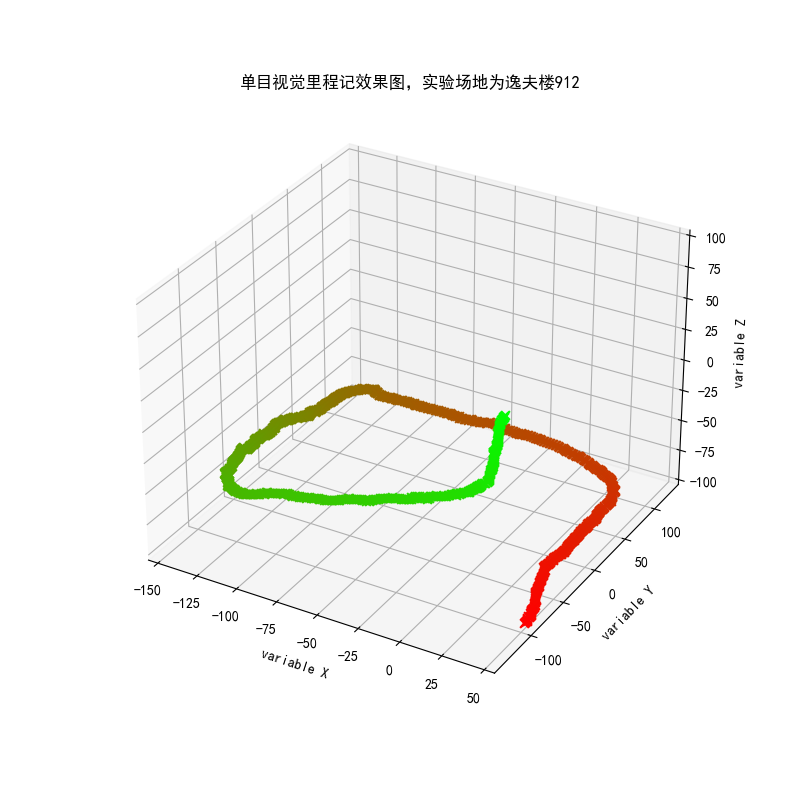

In [6]:
# 绘图
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
P = Ts[0]
i = 0
L = len(Ts)
for T in Ts:
    i += 1
    r = i / L
    g = 1 - i / L
    P = P @ T
    ax.scatter(P[0][-1], P[2][-1], P[1][-1],
               marker='x', color=[(r,g,0)], s=40, label='class 1')
ax.set_xlabel('variable X')
ax.set_ylabel('variable Y')
ax.set_zlabel('variable Z')

ax.set_zlim((-100, 100))

plt.title('单目视觉里程记效果图，实验场地为逸夫楼912')

plt.show()


上图中，其中绿色为起点，红色为终点，其中起点所在的直线应该与终点所在的直线重合，但是由于视觉里程记的误差，他们并没有重合。

In [7]:
print("最终的相机位姿矩阵为：")
print(P)
print("最终的相机坐标高度为：")
print(P[1][-1])

最终的相机位姿矩阵为：
[[ 9.95065534e-01 -8.89806942e-02 -4.38978333e-02  4.15995739e+01]
 [ 9.53079531e-02  9.80201806e-01  1.73553489e-01 -1.14737298e+02]
 [ 2.75858255e-02 -1.76880908e-01  9.83845601e-01 -7.31646012e+01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
最终的相机坐标高度为：
-114.73729812365103


在视觉里程记的实验中，可以看到最终画出了大致的位移曲线，但是依旧误差较大，且在高度上有极大的累积误差。
只使用对极约束得到的相机位姿并没有具体到单位的实际物理长度，只有相对于一个位置的空间尺度的比例信息。
在后续的工作中，考虑使用**PnP**代替纯对极几何计算相机位姿，同时使用**后端优化**对误差进行校正。